# MA934 - class 1

You should make at least one commit to your repository per computational task below - usually more.


## Task 1

Make sure that you can run the sample code in main.jl

Add a new function to the module Starter.jl that reads in parameters $\alpha$ and $n$ and produces a log plot of some samples of the function $$f(x) = x^\alpha \, \log(x)$$
at values of $x$ that increase in powers of 2 from 1 to $2^n$. This should only involve minor modifications of the existing code.

## Task 2

Write a new module containing functions that compute the $n^{th}$ term, $a_n$, in the Fibonacci sequence:
 * Iteratively
 * Recursively
 * Using memoization (hint: use Julia's Dict type for the lookup table)
 
The functions should work starting from any given values of $a_1$ and $a_2$.

Use the BenchmarkTools.jl package to measure the run-time of each of these functions over a range of values of $n$ and produce a plot to illustrate your results.

The recursive function implementation gets slow very quickly - I could only do up to $n=48$ on my laptop. Write a recursion relation for the computational complexity of the recursive version of the task. Solve it to prove that the computational complexity grows exponentially with $n$.

## Task 3

The computational complexity of the naive divide-and-conquer algorithm for matrix multiplication satisfies the functional equation $$F(n) = 8 F(n/2) + 4 (n/2)^2$$ with $F(1)=1$.

The corresponding equation for Strassen multiplication is $$F(n) = 7 F(n/2) + 18 (n/2)^2$$ with $F(1)=1$.

Solve these recurrence relations explicitly to prove that the computational complexity of the two algorithms are $O(n^3)$ and $O(n^{\log_2(7)})$ respectively. 

It is helpful to adopt the change of variables $n=2^p$ with $a_p = F(2^p)$ to obtain linear (albeit inhomogeneous) recursion relations. 

Some helpful online notes about solving recursion relations can be found at:

https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematics_recurrence_relation.htm

In [1]:
push!(LOAD_PATH, pwd())

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "C:\\Users\\AJAYI OLAYINKA\\MathSys\\MA934\\ma934-worksheet-1-olayinkaajayi"

In [2]:
using Revise

args[group2][parameter3] = 10.0  Type = 

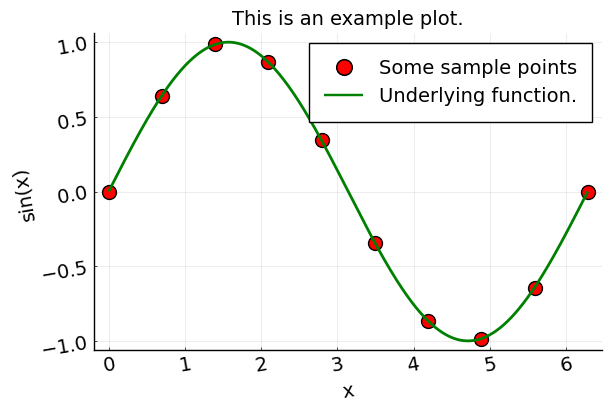

Float64
args[group2][parameter4] = test.csv  Type = String
args[group1][parameter1] = 10  Type = Int64
args[group1][parameter2] = This is some text  Type = String
args[group3][parameter5] = 20  Type = Int64
args[group3][parameter6] = 3  Type = Int64


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


In [3]:
include("main.jl")

In [ ]:
using Pkg

In [4]:
#Pkg.add("Revise")
#Pkg.add("YAML")

In [5]:
#Pkg.add("BenchmarkTools")

In [6]:
using BenchmarkTools

In [7]:
include("FibPack.jl")

Main.fibonaci

In [8]:
using .fibonaci

In [9]:
n=10

10

In [13]:
size_range= 10

times_it = Float64[]; sizes = 1:size_range
for n in sizes
    bm = @benchmark fib_iterative($n)
    push!(times_it, median(bm.times))
end

times_re = Float64[]; sizes = 1:size_range
for n in sizes
    bm = @benchmark fib_recursive($n)
    push!(times_re, median(bm.times))
end

times_me = Float64[]; sizes = 1:size_range
for n in sizes
    bm = @benchmark fib_memoization($n)
    push!(times_me, median(bm.times))
end

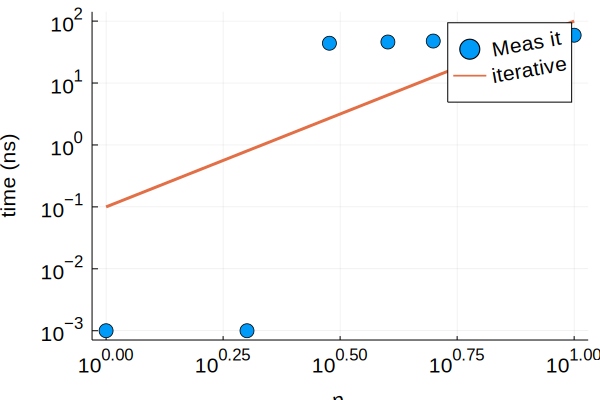

In [29]:
scatter(sizes, times_it, yscale=:log10, xscale=:log10, 
    label="Meas it",ylabel="time (ns)", xlabel="n", markersize=8)
plot!(sizes, 0.1*sizes.^3.0, label = "iterative", linewidth=3)

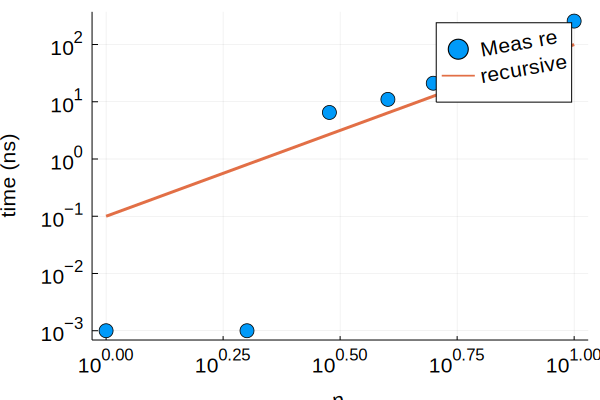

In [28]:
scatter(sizes, times_re, yscale=:log10, xscale=:log10, 
    label="Meas re",ylabel="time (ns)", xlabel="n", markersize=8)
plot!(sizes, 0.1*sizes.^3.0, label = "recursive", linewidth=3)

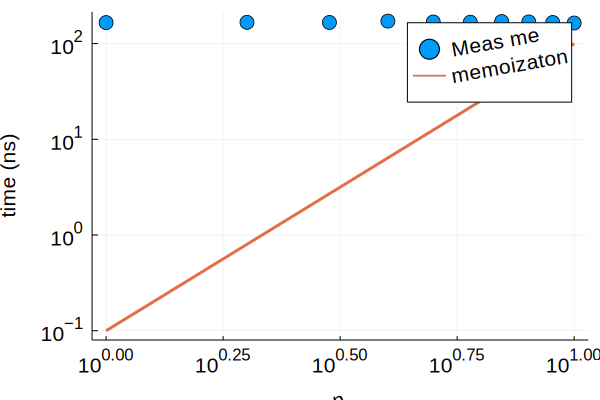

In [19]:
scatter(sizes, times_me, yscale=:log10, xscale=:log10, 
    label="Meas me",ylabel="time (ns)", xlabel="n", markersize=8)
plot!(sizes, 0.1*sizes.^3.0, label = "memoizaton", linewidth=3)